# Investigate Data

I want to take a look at the data, means, distribution etc.

In [1]:
import os.path
import io
import itertools

import numpy as np
from time import time

from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
import keras.layers as layers
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.callbacks import TensorBoard
import matplotlib.pyplot as plt
import matplotlib

from astropy.io import fits
from astropy.table import Table

from decimal import Decimal
import math

from utils import *

directory = '/data/'
info_file = os.path.join(directory, 'stamps3.ecsv')

Using TensorFlow backend.


## User Methods

In [3]:
def get_input(filename):
    """
    Loader function for teh data given a filename
    """
    
    f = fits.open(os.path.join(directory, filename))
    img = f[0].data.transpose((1, 2, 0)) # move channels to last
    return img


def get_output(dwarf_table_row, columns):    
    """
    Loader function for the y_true parameters.
    """
    
    return np.array([scale_column(column_scaling, c, dwarf_table_row[c]) for c in columns])

def preprocess_input(image):
    """
    Any preprocessing we want done... none at this point.
    """
    
#     --- Rescale Image
#     --- Rotate Image
#     --- Resize Image
#     --- Flip Image
#     --- PCA etc.
    
    return(image)


## Load the Information File

In [4]:
dwarfs_table = Table.read(info_file, format='ascii.ecsv')
dwarfs_table

<Table length=11842>
                      filename                       logmass ... noise_z noise_y
                       str52                         float64 ... float64 float64
---------------------------------------------------- ------- ... ------- -------
stamps3/d14.09_m6.19_re0.40_feh-1.8_age13.3_HSC.fits  6.1866 ...  0.0208  0.0203
stamps3/d11.87_m8.38_re0.81_feh-1.0_age10.1_HSC.fits  8.3765 ...  0.0204  0.0203
stamps3/d11.07_m6.84_re0.49_feh-1.5_age14.7_HSC.fits  6.8434 ...  0.0201  0.0208
  stamps3/d1.74_m8.75_re0.91_feh-0.8_age7.9_HSC.fits  8.7495 ...  0.0200  0.0203
stamps3/d12.56_m6.25_re0.41_feh-1.5_age10.1_HSC.fits  6.2513 ...  0.0209  0.0209
 stamps3/d8.91_m8.43_re0.82_feh-1.0_age10.9_HSC.fits  8.4296 ...  0.0207  0.0207
 stamps3/d3.30_m6.60_re0.46_feh-1.5_age11.3_HSC.fits  6.6019 ...  0.0201  0.0205
 stamps3/d3.86_m5.14_re0.29_feh-2.0_age11.6_HSC.fits  5.1433 ...  0.0208  0.0207
  stamps3/d2.63_m7.32_re0.58_feh-1.2_age9.6_HSC.fits  7.3225 ...  0.0207  0.0201
 stamps3/d5.54_m7.09_re0.54_feh-1.2_age13.5_HSC.fits  7.0914 ...  0.0204  0.0203
                                                 ...     ... ...     ...     ...
stamps3/d11.35_m5.44_re0.32_feh-1.8_age13.6_HSC.fits  5.4360 ...  0.0209  0.0203
 stamps3/d11.63_m6.92_re0.51_feh-1.5_age8.9_HSC.fits  6.9219 ...  0.0206  0.0200
 stamps3/d2.16_m5.37_re0.31_feh-2.0_age12.5_HSC.fits  5.3670 ...  0.0208  0.0206
  stamps3/d8.38_m6.15_re0.40_feh-1.8_age9.7_HSC.fits  6.1500 ...  0.0203  0.0203
  stamps3/d5.70_m6.68_re0.47_feh-1.5_age8.7_HSC.fits  6.6838 ...  0.0205  0.0204
 stamps3/d3.11_m5.24_re0.30_feh-2.0_age10.2_HSC.fits  5.2359 ...  0.0207  0.0204
 stamps3/d6.17_m6.42_re0.43_feh-1.5_age13.7_HSC.fits  6.4222 ...  0.0203  0.0210
 stamps3/d6.78_m7.99_re0.71_feh-1.0_age11.6_HSC.fits  7.9878 ...  0.0200  0.0206
stamps3/d12.79_m7.28_re0.57_feh-1.2_age13.8_HSC.fits  7.2829 ...  0.0207  0.0201
 stamps3/d3.86_m7.51_re0.61_feh-1.2_age10.1_HSC.fits  7.5052 ...  0.0207  0.0201

In [5]:
row_indices = np.arange(len(dwarfs_table))

random_rows = np.random.choice(dwarfs_table, 100)

In [6]:
for row in random_rows:
    im = get_input(os.path.join(directory, row['filename']))
    print('Row {}: max, min {} {},  mean {}'.format(
        row['filename'], np.max(im), np.min(im), np.mean(im)))

Row stamps3/d7.23_m6.47_re0.44_feh-1.5_age12.1_HSC.fits: max, min 0.38626821016659496 -0.08317795595692905,  mean 0.02879129631033369
Row stamps3/d10.63_m5.53_re0.32_feh-1.8_age11.1_HSC.fits: max, min 0.12297599709426356 -0.09701795034858066,  mean 0.001800088761695343
Row stamps3/d6.84_m7.04_re0.53_feh-1.5_age11.5_HSC.fits: max, min 1.227115297999431 -0.06409414231092847,  mean 0.1316798248813867
Row stamps3/d14.47_m7.10_re0.54_feh-1.2_age13.1_HSC.fits: max, min 0.8299763772546797 -0.093032587182206,  mean 0.030477811197115873
Row stamps3/d10.19_m6.63_re0.46_feh-1.5_age10.0_HSC.fits: max, min 0.5265117418216135 -0.09159536807221318,  mean 0.024461292683750354
Row stamps3/d11.59_m6.41_re0.43_feh-1.5_age10.4_HSC.fits: max, min 0.2822273667546215 -0.09253139494063094,  mean 0.011437001768139004
Row stamps3/d8.10_m6.50_re0.44_feh-1.5_age13.3_HSC.fits: max, min 0.4318519763003375 -0.0864180913798506,  mean 0.023681031330930042
Row stamps3/d12.73_m6.89_re0.50_feh-1.5_age11.7_HSC.fits: max, 

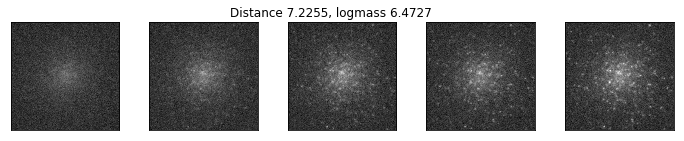

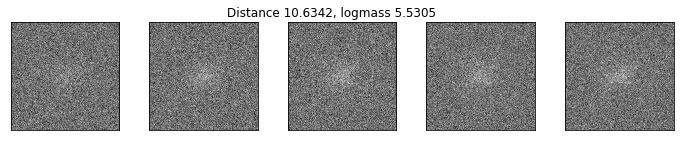

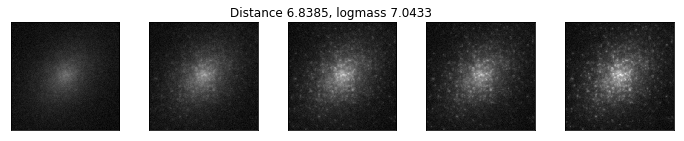

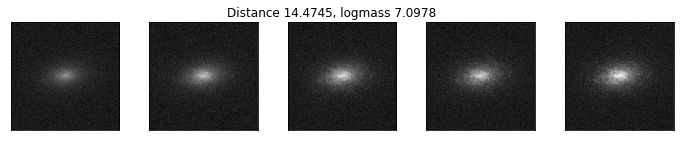

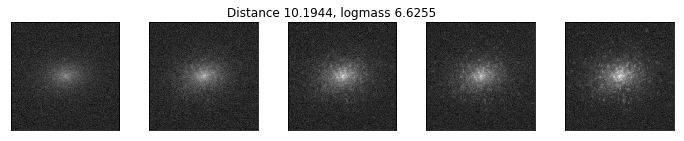

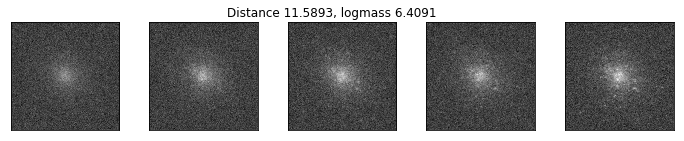

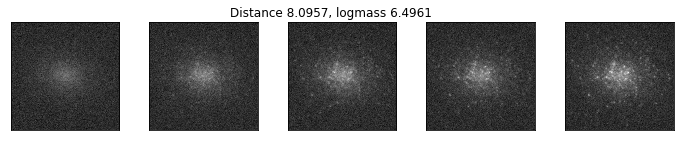

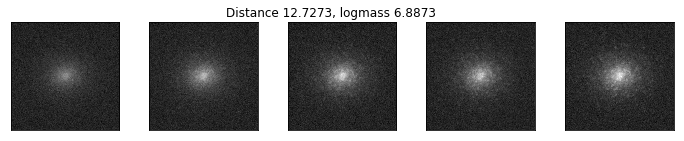

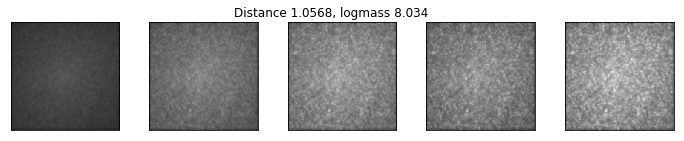

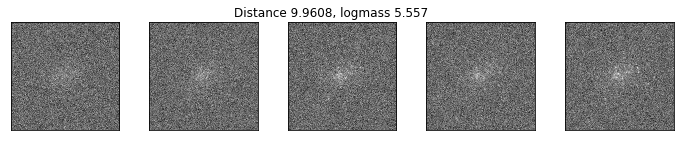

In [7]:
for rowi, row in enumerate(random_rows[:10]):
    im = get_input(os.path.join(directory, row['filename']))
    
    plt.figure(figsize=[12,2])
    for channeli in range(5):
        plt.subplot(1, 5, channeli+1)
        plt.imshow(im[:,:,channeli])
        plt.xticks([])
        plt.yticks([])
        plt.clim((np.min(im), np.max(im)))
        plt.gray()
        plt.suptitle('Distance {}, logmass {}'.format(row['distance'], row['logmass']))

## Histogram of the Distances

(array([1193., 1171., 1192., 1202., 1173., 1178., 1095., 1208., 1249.,
        1181.]),
 array([ 1.0008 ,  2.40071,  3.80062,  5.20053,  6.60044,  8.00035,
         9.40026, 10.80017, 12.20008, 13.59999, 14.9999 ]),
 <a list of 10 Patch objects>)

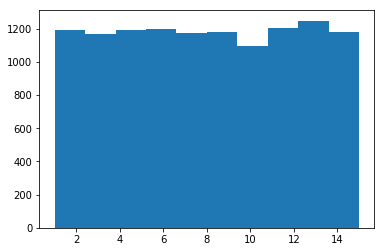

In [9]:
plt.hist(dwarfs_table['distance'])

## Histogram of the logmass

(array([1172., 1165., 1144., 1222., 1169., 1201., 1196., 1183., 1201.,
        1189.]),
 array([5.0003 , 5.40026, 5.80022, 6.20018, 6.60014, 7.0001 , 7.40006,
        7.80002, 8.19998, 8.59994, 8.9999 ]),
 <a list of 10 Patch objects>)

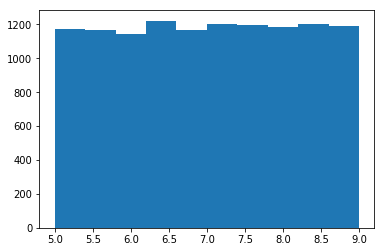

In [10]:
plt.hist(dwarfs_table['logmass'])